In [32]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [2]:
#y_true = 30
#y_pred 20

#b1=>10
#b2=>8
#b3=>15

(10+8+15)/3

11.0

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [5]:
ls data


womens_shoes.csv


In [6]:
df = pd.read_csv('data/womens_shoes.csv')
df.shape

(18001, 47)

In [7]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'websiteids', 'weight'],
      dtype='object')

In [8]:
mean_price = np.mean(df['prices_amountmin'])
mean_price

80.91430476084132

In [10]:
[3] * 5

[3, 3, 3, 3, 3]

In [13]:
y_true = df['prices_amountmin']
y_pred = [mean_price]*y_true.shape[0]

mean_absolute_error(y_true, y_pred)
          

67.18691922456821

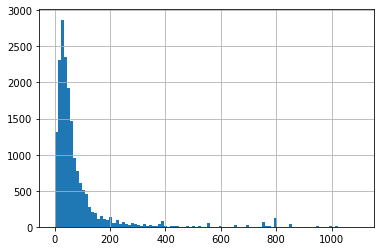

In [14]:
df['prices_amountmin'].hist(bins=100)

0.0

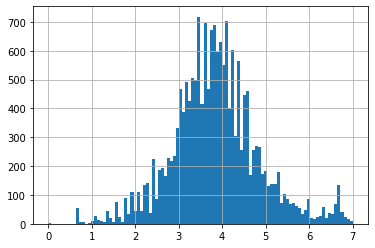

In [16]:
np.log1p(df['prices_amountmin']).hist(bins=100)
np.log1p(0)

In [17]:
 y_true = df['prices_amountmin']
y_pred = [np.median(y_true)]*y_true.shape[0]

mean_absolute_error(y_true, y_pred)

56.284606410754954

In [18]:
np.median(y_true)

44.9

In [24]:
y_true = df['prices_amountmin']
price_log_mean = np.expm1(np.mean (np.log1p(y_true)))
y_pred = [price_log_mean]*y_true.shape[0]

mean_absolute_error(y_true, y_pred)


56.31106186683235

In [22]:
np.exp (np.mean (np.log1p(y_true)))-1

45.93639357116868

In [25]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'websiteids', 'weight'],
      dtype='object')

In [26]:
df.brand.value_counts()

Ralph Lauren               472
Nike                       366
TOMS                       327
MUK LUKS                   237
Easy Spirit                232
                          ... 
Fabrication Enterprises      1
Ilse Jacobsen Hornbaek       1
Glaze                        1
Maria Claire                 1
Alpine                       1
Name: brand, Length: 2090, dtype: int64

In [27]:
df['brand'].factorize()

(array([   0,    0,    0, ..., 1220, 1220, 1220]),
 Index(['Zoot', 'Wild Pair', 'Sutton Studio', 'LaLeela.com', 'Reebok',
        'Jessica Simpson', 'The Highest Heel', 'Qupid', 'Alfani', 'Me Too',
        ...
        'SugarShoes', 'TBJE Slide Pendants', 'Athletech', 'ANNE MICHELLE',
        'EARTH SHOES', 'Goddessey LLC', 'Andrew Geller', 'Miss Selfridge',
        '3dRose', 'NIXON'],
       dtype='object', length=2090))

In [28]:
df['brand'].factorize()[0]

array([   0,    0,    0, ..., 1220, 1220, 1220])

In [0]:
df['brand_cat']=df['brand'].factorize()[0]

In [35]:
feats = ['brand_cat']
X = df[feats].values
y=df['prices_amountmin'].values

model=DecisionTreeRegressor(max_depth=5)
cross_val_score(model, X, y, scoring='neg_mean_absolute_error')



ValueError: ignored

In [36]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [37]:
feats = ['brand_cat']
X = df[feats].values
y=df['prices_amountmin'].values

model=DecisionTreeRegressor(max_depth=5)
cross_val_score(model, X, y, scoring='neg_mean_absolute_error')

array([-51.24992026, -50.75909939, -52.13881083, -52.09482253,
       -52.65245927])

In [38]:
feats = ['brand_cat']
X = df[feats].values
y=df['prices_amountmin'].values

model=DecisionTreeRegressor(max_depth=5)
scores=cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-51.7790224568183, 0.6800384408022533)

In [0]:


def run_model(feats):
  X = df[feats].values
  y=df['prices_amountmin'].values

  model=DecisionTreeRegressor(max_depth=5)
  scores=cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [41]:
run_model(['brand_cat'])

(-51.7790224568183, 0.6800384408022533)

In [0]:
df['manufacturer_cat']=df['manufacturer'].factorize()[0]

In [43]:
feats = ['manufacturer_cat']
X = df[feats].values
y=df['prices_amountmin'].values

model=DecisionTreeRegressor(max_depth=5)
scores=cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-67.71896474272188, 3.887282618857807)

In [0]:
def run_model(feats):
  X = df[feats].values
  y=df['prices_amountmin'].values

  model=DecisionTreeRegressor(max_depth=5)
  scores=cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [45]:
run_model(['manufacturer_cat'])

(-67.71896474272188, 3.887282618857807)

In [46]:
run_model(['manufacturer_cat', 'brand_cat'])

(-51.45401686830778, 0.8875568782863182)

In [0]:
!git add ma